# Lab 5: Scikit Learn, Classification and Clustering
UIC CS 418, Spring 2023 - CC

## Academic Integrity Policy

According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. 
If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA.

Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

We will run your code through MOSS software to detect copying and plagiarism.

##To submit this assignment:
1. Execute all commands and complete this notebook	
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 5 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 5*. 

### [Read and follow the prelab before answering the questions here](https://colab.research.google.com/drive/1digjhC-XpN07t7o7OATCUs9SESzzkmWI?usp=sharing)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

#SVM on Breast Cancer Dataset

## Q 5.1 (30 pts)

Now it's your turn to work with SVM. The breast cancer data set is imported above.

In the following code cell, load the data. Look at the paramters accepted by load_breast_cancer (return_X_y and as_frame), they might be useful.

In [2]:
#your code here
import pandas as pd
data, target = load_breast_cancer(return_X_y=True, as_frame=True)
#data = pd.DataFrame(data, columns=[load_breast_cancer().feature_names])
#target = pd.DataFrame(target)
print(data.head)
print(target.head)

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In the following code cell, split the dataset into train set and test set. The size of the test set should be 20%. Also print the number of rows in each set after splitting (values should be printed for x and y/target). Also note that any modifications needed on the data should be made separately, so do not modify the same variables after splitting.

In [3]:
#your code here
X_train , X_test, y_train, y_test = train_test_split(data, target , test_size = 0.2,random_state=1996)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


### Linear SVM

Here, train a linear svm model on only the first 2 columns of the dataset (do not make changes to the original dataset as you may need it later on). After training the model, print the training accuracy, testing accuracy, classification report on the test set, and the confusion matrix on the test set. The required method has been imported for you from sklearn and you can read the docs to understand how to use it.

In [4]:
#your code here (linear model trained on first 2 columns)
X_train_2 = X_train.iloc[:,0:2]
X_test_2 = X_test.iloc[:,0:2]
clf1 = svm.SVC(kernel = 'linear')
clf1.fit(X_train_2, y_train)
y_predict_train = clf1.predict(X_train_2)
y_predict_test = clf1.predict(X_test_2)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))
print(metrics.confusion_matrix(y_test, y_predict_test))

Training:
Accuracy:  0.8835164835164835
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       171
           1       0.88      0.94      0.91       284

    accuracy                           0.88       455
   macro avg       0.88      0.86      0.87       455
weighted avg       0.88      0.88      0.88       455

[[135  36]
 [ 17 267]]


Testing:
Accuracy:  0.9035087719298246
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.89      0.97      0.93        73

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

[[32  9]
 [ 2 71]]


Do the same thing as above, but on the entire training set instead of just the first 2 columns. 

In [5]:
#your code here (linear model trained on entire training set)
clf2 = svm.SVC(kernel = 'linear')
clf2.fit(X_train, y_train)
y_predict_train_2 = clf2.predict(X_train)
y_predict_test_2 = clf2.predict(X_test)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_2))
print(metrics.classification_report(y_train, y_predict_train_2))
print(metrics.confusion_matrix(y_train, y_predict_train_2))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_2))
print(metrics.classification_report(y_test, y_predict_test_2))
print(metrics.confusion_matrix(y_test, y_predict_test_2))

Training:
Accuracy:  0.9582417582417583
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       171
           1       0.95      0.98      0.97       284

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455

[[157  14]
 [  5 279]]


Testing:
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.96      1.00      0.98        73

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[38  3]
 [ 0 73]]


### Non Linear SVM

Follow the same instructions as above, but use only the first 2 columns, and a *non linear* kernel.

In [6]:
#your code here (non linear model trained on first 2 columns)
#X_train_2 = X_train.iloc[:,0:2]
#X_test_2 = X_test.iloc[:,0:2]
clf3 = svm.SVC(kernel = 'rbf')
clf3.fit(X_train_2, y_train)
y_predict_train_3 = clf3.predict(X_train_2)
y_predict_test_3 = clf3.predict(X_test_2)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_3))
print(metrics.classification_report(y_train, y_predict_train_3))
print(metrics.confusion_matrix(y_train, y_predict_train_3))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_3))
print(metrics.classification_report(y_test, y_predict_test_3))
print(metrics.confusion_matrix(y_test, y_predict_test_3))

Training:
Accuracy:  0.9010989010989011
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       171
           1       0.90      0.95      0.92       284

    accuracy                           0.90       455
   macro avg       0.90      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455

[[141  30]
 [ 15 269]]


Testing:
Accuracy:  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.92      0.99      0.95        73

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[35  6]
 [ 1 72]]


Follow the same instructions as above (*non linear* kernel), but on the entire training set (all columns)

In [7]:
#your code here (non linear model trained on entire training set)
clf4 = svm.SVC(kernel = 'rbf')
clf4.fit(X_train, y_train)
y_predict_train_4 = clf4.predict(X_train)
y_predict_test_4 = clf4.predict(X_test)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_4))
print(metrics.classification_report(y_train, y_predict_train_4))
print(metrics.confusion_matrix(y_train, y_predict_train_4))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_4))
print(metrics.classification_report(y_test, y_predict_test_4))
print(metrics.confusion_matrix(y_test, y_predict_test_4))

Training:
Accuracy:  0.9142857142857143
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       171
           1       0.90      0.98      0.93       284

    accuracy                           0.91       455
   macro avg       0.92      0.89      0.91       455
weighted avg       0.92      0.91      0.91       455

[[139  32]
 [  7 277]]


Testing:
Accuracy:  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.92      0.99      0.95        73

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[35  6]
 [ 1 72]]


Out of the 4 models above, which gave the best performance. To determine the performance, don't just look at the accuracy, consider the precision and recall as well and report based on that.

Which metric is more important in the case of cancer (accuracy, precision or recall?): The most important metric is Recall, since this is a medical dataset and it is very important to know how many instances that are positive are correctly predicted as positive.

Which model performed the best?: The best model is using all features with a linear SVM

How did you come to this conclusion?: I came to this conclusion by checking the recall value for our 4 models, and choosing the one that had the best recall across training and testing data.

## Exercise 5.2 (10 pts)

Scaling features is another step that can affect the performance of your classifier. 


* Scale the features using `StandardScaler`
* Perform SVM on the dataset (using the best model architecture from above) Note that you will have to retrain the model on the scaled features.
* After training the model, print the training accuracy, testing accuracy, classification report on the test set, and the confusion matrix on the test set.

In [8]:
#Your code here (linear model trained on entire training set with scaled features)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf5 = svm.SVC(kernel = 'linear')
clf5.fit(X_train_scaled, y_train)
y_predict_train_5 = clf5.predict(X_train_scaled)
y_predict_test_5 = clf5.predict(X_test_scaled)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_5))
print(metrics.classification_report(y_train, y_predict_train_5))
print(metrics.confusion_matrix(y_train, y_predict_train_5))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_5))
print(metrics.classification_report(y_test, y_predict_test_5))
print(metrics.confusion_matrix(y_test, y_predict_test_5))

Training:
Accuracy:  0.9868131868131869
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       171
           1       0.98      1.00      0.99       284

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455

[[166   5]
 [  1 283]]


Testing:
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.96      1.00      0.98        73

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[38  3]
 [ 0 73]]


Did scaling the data have an effect on the performance?

Your answer here: Scaling improved performance for the Training dataset, but the performance remained the same for the testing dataset.

## Exercise 5.3 (20 pts)

scikit-learn has many other classifiers. Pick any 2 other classifiers of your choice ( KNN, DecisionTree, NaiveBayes, RandomForest ...) and apply it to the same (non scaled) dataset. Display the same performance metrics as before.

In [9]:
#Your code goes here (model 1 on non scaled features)
from sklearn.tree import DecisionTreeClassifier
clf6 = DecisionTreeClassifier(random_state=44)
clf6.fit(X_train,y_train)
y_predict_train_6 = clf6.predict(X_train)
y_predict_test_6 = clf6.predict(X_test)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_6))
print(metrics.classification_report(y_train, y_predict_train_6))
print(metrics.confusion_matrix(y_train, y_predict_train_6))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_6))
print(metrics.classification_report(y_test, y_predict_test_6))
print(metrics.confusion_matrix(y_test, y_predict_test_6))

Training:
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       284

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

[[171   0]
 [  0 284]]


Testing:
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.96      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

[[41  0]
 [ 3 70]]


In [10]:
#Your code goes here (model 2 on non scaled features)
from sklearn.neighbors import KNeighborsClassifier
clf7 = KNeighborsClassifier(n_neighbors=3)
clf7.fit(X_train,y_train)
y_predict_train_7 = clf7.predict(X_train)
y_predict_test_7 = clf7.predict(X_test)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_7))
print(metrics.classification_report(y_train, y_predict_train_7))
print(metrics.confusion_matrix(y_train, y_predict_train_7))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_7))
print(metrics.classification_report(y_test, y_predict_test_7))
print(metrics.confusion_matrix(y_test, y_predict_test_7))

Training:
Accuracy:  0.9538461538461539
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       171
           1       0.95      0.98      0.96       284

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

[[155  16]
 [  5 279]]


Testing:
Accuracy:  0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.95      0.99      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[[37  4]
 [ 1 72]]


Now do the same thing as above, but on the scaled data.

In [11]:
#Your code goes here (model 1 on scaled features)
clf8 = DecisionTreeClassifier(random_state=44)
clf8.fit(X_train_scaled,y_train)
y_predict_train_8 = clf8.predict(X_train_scaled)
y_predict_test_8 = clf8.predict(X_test_scaled)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_8))
print(metrics.classification_report(y_train, y_predict_train_8))
print(metrics.confusion_matrix(y_train, y_predict_train_8))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_8))
print(metrics.classification_report(y_test, y_predict_test_8))
print(metrics.confusion_matrix(y_test, y_predict_test_8))

Training:
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       284

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

[[171   0]
 [  0 284]]


Testing:
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.96      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

[[41  0]
 [ 3 70]]


In [12]:
#Your code goes here (model 2 on scaled features)
clf9 = KNeighborsClassifier(n_neighbors=3)
clf9.fit(X_train_scaled,y_train)
y_predict_train_9 = clf9.predict(X_train_scaled)
y_predict_test_9 = clf9.predict(X_test_scaled)
print('Training:')
print('Accuracy: ',metrics.accuracy_score(y_train, y_predict_train_9))
print(metrics.classification_report(y_train, y_predict_train_9))
print(metrics.confusion_matrix(y_train, y_predict_train_9))
print('\n\nTesting:')
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict_test_9))
print(metrics.classification_report(y_test, y_predict_test_9))
print(metrics.confusion_matrix(y_test, y_predict_test_9))

Training:
Accuracy:  0.9802197802197802
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       171
           1       0.98      0.99      0.98       284

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

[[164   7]
 [  2 282]]


Testing:
Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[39  2]
 [ 1 72]]


## Exercise 5.4 ( 30 pts)
* First choose the first two features (feature #0 and feature #1) and apply kmeans clustering (k=2 because we are trying to compare ).
* Display cluster evaluation metrics `homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. (This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

In [13]:
# Your code here (clustering with features 0 and 1)
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

Training:
Homogeneity Score:  0.3064058109816789
Completeness Score:  0.2955286670013464


Testing:
Homogeneity Score:  0.3894042512468945
Completeness Score:  0.3894042512468945


c:\Users\utsav\anaconda3\envs\CS418\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


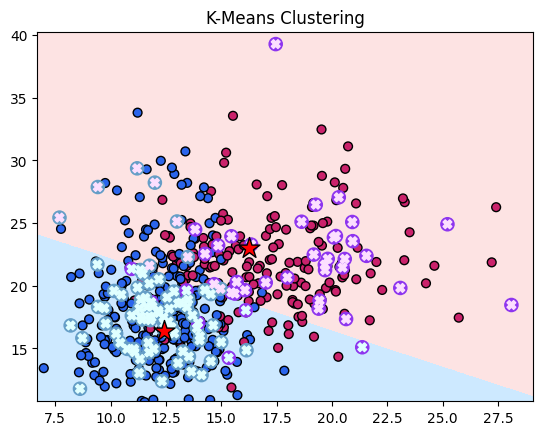

In [14]:
from matplotlib.colors import ListedColormap
#X_train_2 = X_train.iloc[:,0:2]
#X_test_2 = X_test.iloc[:,0:2]
kmeans = KMeans(n_clusters=2, init='random')#, n_init=300
kmeans.fit(X_train_2)
y_predict_train_10 = kmeans.predict(X_train_2)
y_predict_test_10 = kmeans.predict(X_test_2)
print('Training:')
print('Homogeneity Score: ',metrics.homogeneity_score(y_train.values.flatten(), y_predict_train_10))
print('Completeness Score: ',metrics.completeness_score(y_train.values.flatten(), y_predict_train_10))
print('\n\nTesting:')
print('Homogeneity Score: ',metrics.homogeneity_score(y_test.values.flatten(), y_predict_test_10))
print('Completeness Score: ',metrics.completeness_score(y_test.values.flatten(), y_predict_test_10))


xx , yy = meshGrid(X_test_2.iloc[:,0], X_test_2.iloc[:,1], 0.01)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light,alpha=0.4)
plt.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test_2.iloc[:, 0], X_test_2.iloc[:, 1], alpha=1.0, c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test_2.iloc[:, 0], X_test_2.iloc[:, 1], alpha=1.0,c = y_predict_test_10, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=250,marker='*',label='centroids',c='red',edgecolor='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('K-Means Clustering')

plt.show()

How good does your model perform?

This model does not perform very well, as we can see from the Homogeneity Score and Completeness score.

## Exercise 5.5 (10 pts)

In the previous model you used the first two features.
For this exercise, pick features 'mean perimeter' and 'mean smoothness' of breast cancer (feature #2 and feature #4) as your two attributes and perform the tasks in Exercise 5.4. (cluster, report metrics, draw decision boundaries)

Training:
Homogeneity Score:  0.45159637439023953
Completeness Score:  0.501387145606025


Testing:
Homogeneity Score:  0.5046822425914103
Completeness Score:  0.5633699342880847


c:\Users\utsav\anaconda3\envs\CS418\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


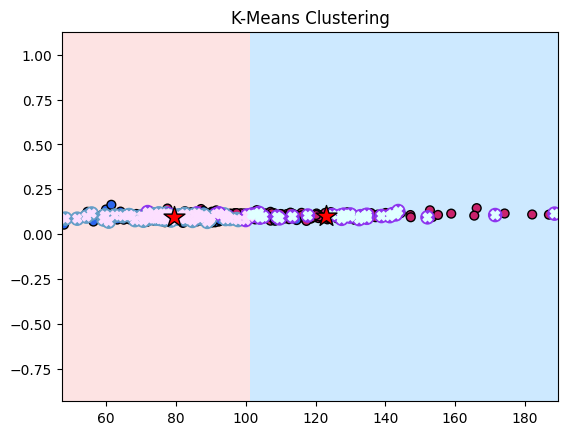

In [15]:
# Your code here (clustering with features 2 and 4)
#print(X_train.head())
X_train_2 = X_train.iloc[:,[2,4]]
X_test_2 = X_test.iloc[:,[2,4]]
#print(X_train_2.head())
kmeans = KMeans(n_clusters=2, init='random')#, n_init=300
kmeans.fit(X_train_2)
y_predict_train_10 = kmeans.predict(X_train_2)
y_predict_test_10 = kmeans.predict(X_test_2)
print('Training:')
print('Homogeneity Score: ',metrics.homogeneity_score(y_train.values.flatten(), y_predict_train_10))
print('Completeness Score: ',metrics.completeness_score(y_train.values.flatten(), y_predict_train_10))
print('\n\nTesting:')
print('Homogeneity Score: ',metrics.homogeneity_score(y_test.values.flatten(), y_predict_test_10))
print('Completeness Score: ',metrics.completeness_score(y_test.values.flatten(), y_predict_test_10))


xx , yy = meshGrid(X_test_2.iloc[:,0], X_test_2.iloc[:,1], 0.01)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light,alpha=0.4)
plt.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(X_test_2.iloc[:, 0], X_test_2.iloc[:, 1], alpha=1.0, c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(X_test_2.iloc[:, 0], X_test_2.iloc[:, 1], alpha=1.0,c = y_predict_test_10, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=250,marker='*',label='centroids',c='red',edgecolor='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('K-Means Clustering')

plt.show()

Which of the above 2 model performed better?

Your answer here: The second model performed better, since it has a higher Homogeneity Score and Completeness Score.